In [1]:
import numpy as np
from sennet.core.mmap_arrays import read_mmap_array

path = "/opt/kaggle/sennet/data_dumps/processed/kidney_3_dense/image"
image = read_mmap_array(path).data

# read labels
label_path = "/opt/kaggle/sennet/data_dumps/processed/kidney_3_dense/label"
labels = read_mmap_array(label_path).data
print(f"{labels.shape=}")

labels.shape=(501, 1706, 1510)


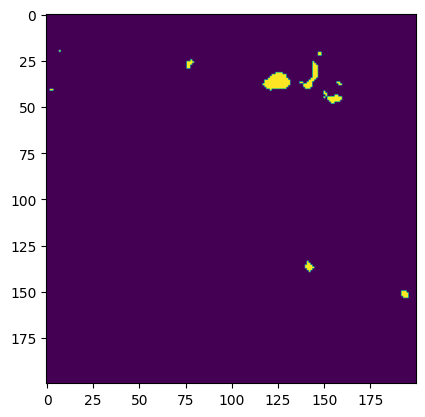

In [11]:
import matplotlib.pyplot as plt

plt.imshow(labels[10, 200:400, 600:800])

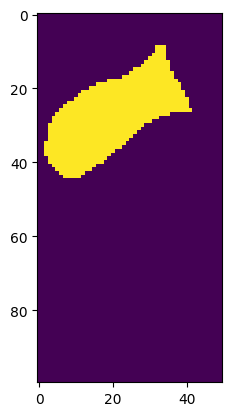

In [12]:
import matplotlib.pyplot as plt

plt.imshow(labels[0, 500:600, 700:750])

In [13]:
from skimage.morphology import flood_fill

fill = flood_fill(labels, seed_point=(0, 530, 720), new_value=255)==255

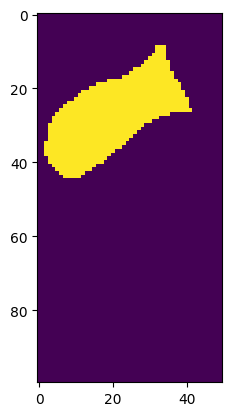

In [14]:
import matplotlib.pyplot as plt

plt.imshow(fill[0, 500:600, 700:750])

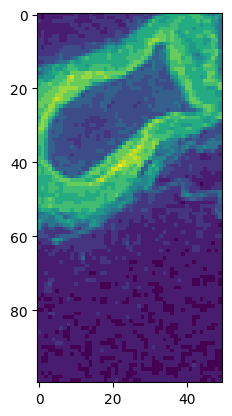

In [16]:
import matplotlib.pyplot as plt

plt.imshow(image[0, 500:600, 700:750])

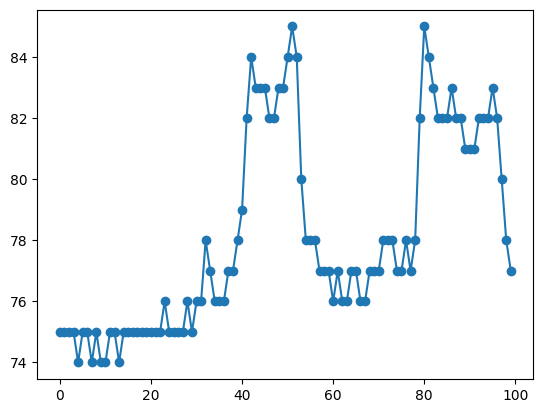

In [37]:
plt.plot(image[0, 450:600, 650:750][80], marker='o')

In [68]:


image_filled = flood_fill(image, seed_point=(0, 530, 720), new_value=255, tolerance=1)==255

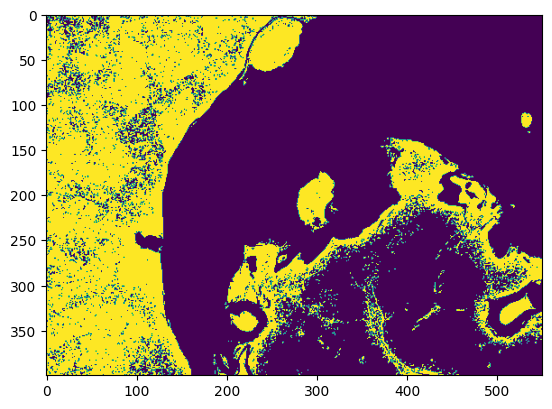

In [69]:
import matplotlib.pyplot as plt

plt.imshow(image_filled[0, 200:600, 200:750])

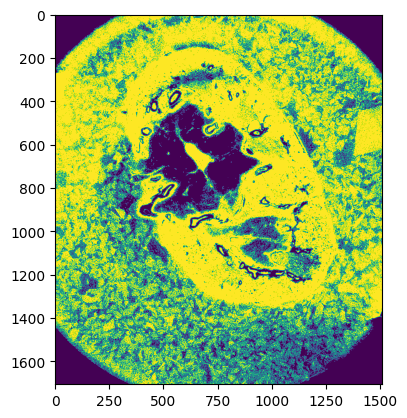

In [112]:
import matplotlib.pyplot as plt

plt.imshow(image_filled_final[0])

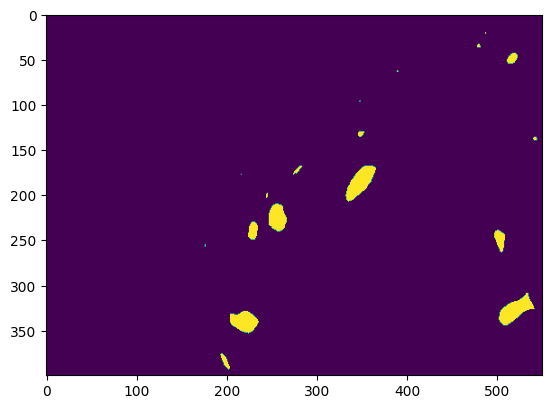

In [71]:
import matplotlib.pyplot as plt

plt.imshow(labels[0, 200:600, 200:750])

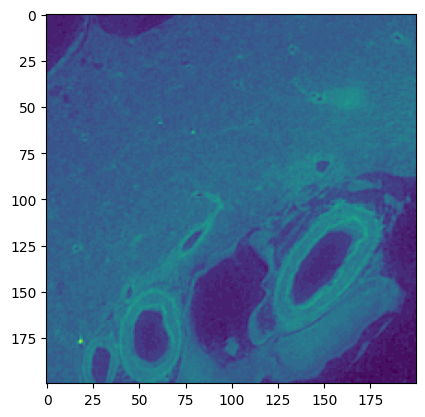

In [72]:
import matplotlib.pyplot as plt

plt.imshow(image[0, 200:600, 200:750][50:250, 200:400])

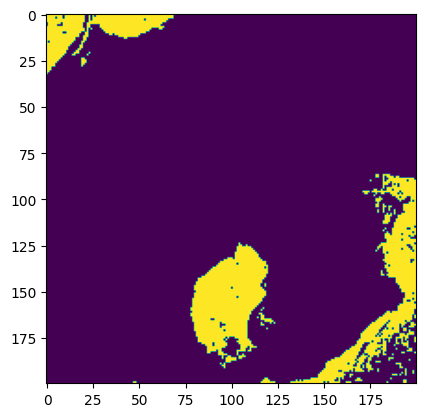

In [73]:
import matplotlib.pyplot as plt

plt.imshow(image_filled[0, 200:600, 200:750][50:250, 200:400])

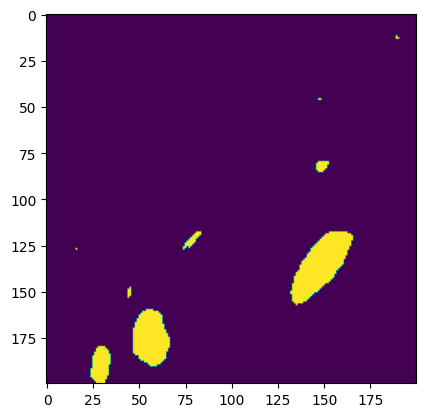

In [74]:
import matplotlib.pyplot as plt

plt.imshow(labels[0, 200:600, 200:750][50:250, 200:400])

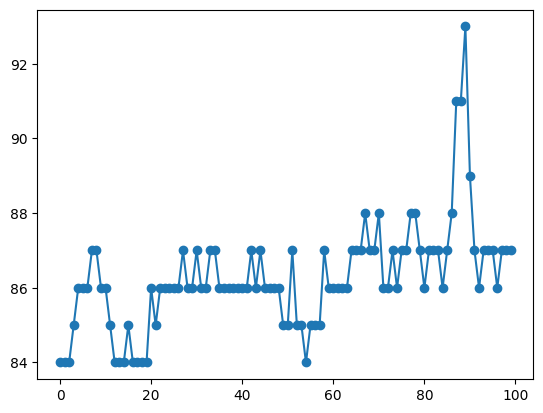

In [75]:

plt.plot(np.max(image[0], axis=0)[600:700], marker='o')

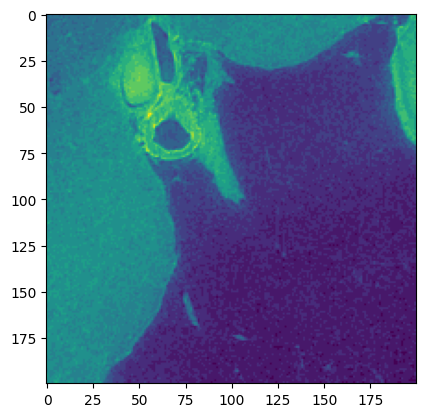

In [90]:
import matplotlib.pyplot as plt

plt.imshow(image[120, 200:600, 200:750][50:250, 200:400])

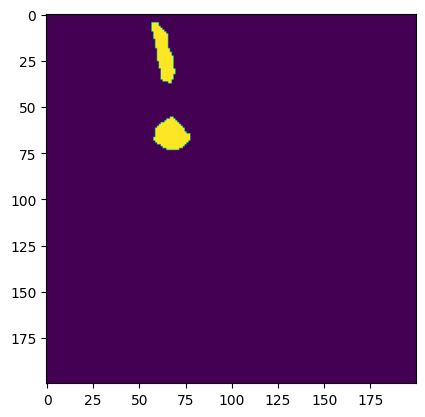

In [93]:
import matplotlib.pyplot as plt

plt.imshow(labels[120, 200:600, 200:750][50:250, 200:400])

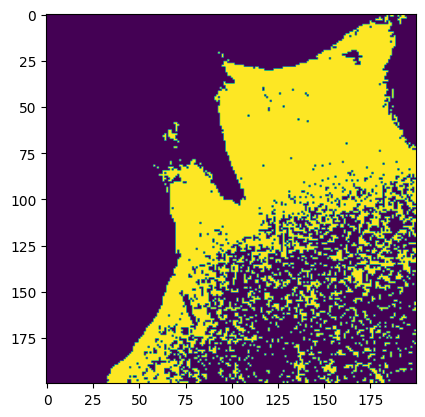

In [92]:
import matplotlib.pyplot as plt

plt.imshow(image_filled[120, 200:600, 200:750][50:250, 200:400])

# Pick random 1000 label points and flood

In [95]:
labels.shape, np.unique(labels)

((501, 1706, 1510), array([0, 1], dtype=uint8))

In [100]:
indices = np.argwhere(labels == 1)
# take random 100
random_indices = np.random.choice(indices.shape[0], 10)
random_indices = indices[random_indices]
random_indices

array([[  3, 965, 645],
       [273, 494, 824],
       [ 46, 933, 723],
       [ 45, 926, 739],
       [225, 523, 887],
       [ 74, 776, 634],
       [445, 684, 813],
       [ 80, 498, 414],
       [ 28, 927, 782],
       [366, 790, 910]])

In [105]:
tuple(random_indices[0])

(3, 965, 645)

In [106]:
from tqdm import tqdm

image_filled_final = flood_fill(image, seed_point=tuple(random_indices[0]), new_value=255, tolerance=1)==255
for random_indx in tqdm(random_indices[1:], total=len(random_indices[1:])):
    print(random_indx)
    image_filled = flood_fill(image, seed_point=tuple(random_indx), new_value=255, tolerance=1)==255
    image_filled_final = np.logical_or(image_filled_final, image_filled)

  0%|          | 0/9 [00:00<?, ?it/s]

[273 494 824]


 11%|█         | 1/9 [00:24<03:18, 24.79s/it]

[ 46 933 723]


 22%|██▏       | 2/9 [00:40<02:17, 19.63s/it]

[ 45 926 739]


 33%|███▎      | 3/9 [00:56<01:46, 17.80s/it]

[225 523 887]


 44%|████▍     | 4/9 [01:08<01:17, 15.56s/it]

[ 74 776 634]


 56%|█████▌    | 5/9 [02:01<01:56, 29.02s/it]

[445 684 813]


 67%|██████▋   | 6/9 [02:23<01:20, 26.77s/it]

[ 80 498 414]


 78%|███████▊  | 7/9 [02:35<00:43, 21.87s/it]

[ 28 927 782]


 89%|████████▉ | 8/9 [02:46<00:18, 18.53s/it]

[366 790 910]


100%|██████████| 9/9 [03:08<00:00, 20.93s/it]


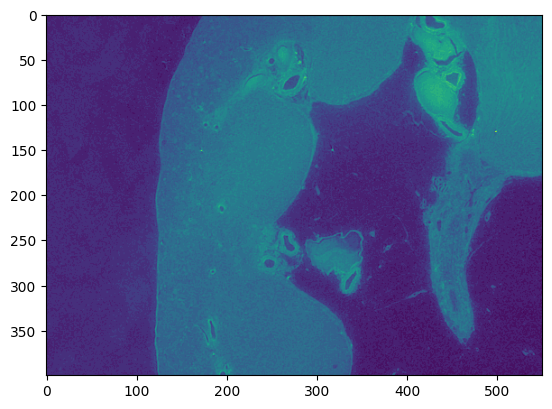

In [117]:
import matplotlib.pyplot as plt

plt.imshow(image[160, 200:600, 200:750])

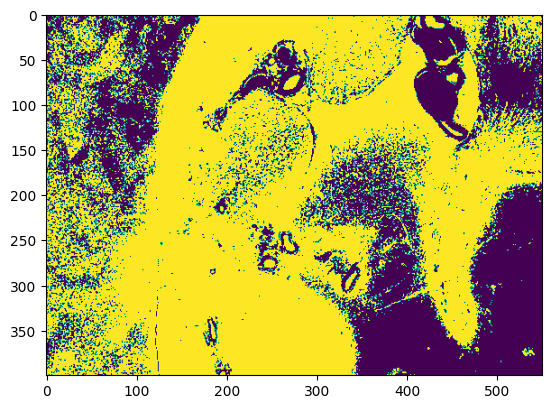

In [115]:
import matplotlib.pyplot as plt

plt.imshow(image_filled_final[160, 200:600, 200:750])

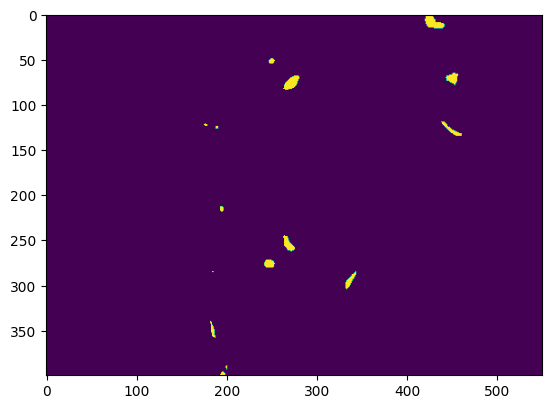

In [116]:
import matplotlib.pyplot as plt

plt.imshow(labels[160, 200:600, 200:750])

# Per slice flood fill


Flood only in 2D, for a single channel. Make 1000 initial seeds, from the labels. Measure F1 score.

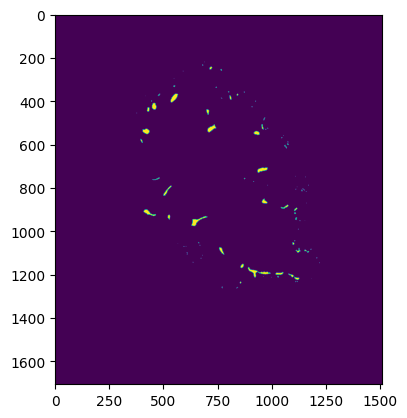

In [2]:
import matplotlib.pyplot as plt
import numpy as np

plt.imshow(labels[0])

In [3]:
indices = np.argwhere(labels[0] == 1)
# take random 10000
random_indices = np.random.choice(indices.shape[0], 1000)
random_indices = indices[random_indices]
random_indices

array([[ 382,  552],
       [ 718,  940],
       [ 906, 1102],
       ...,
       [ 545,  432],
       [1144,  635],
       [ 871,  958]])

In [4]:
random_indices.shape

(1000, 2)

In [5]:
np.min(np.min(random_indices, axis=0))

220

In [6]:
image.shape, labels.shape

((501, 1706, 1510), (501, 1706, 1510))

In [7]:
from tqdm import tqdm
from skimage.morphology import flood_fill

image_filled_final = flood_fill(image[0], seed_point=tuple(random_indices[0]), new_value=255, tolerance=2)==255

for indx in tqdm(range(len(random_indices[1:])), total=len(random_indices[1:])):
	image_filled = flood_fill(image[0], seed_point=tuple(random_indices[indx]), new_value=255, tolerance=2)==255
	if np.sum(image_filled) < 1000:
		image_filled_final = np.logical_or(image_filled_final, image_filled)


accuracy = np.sum(image_filled_final == labels[0]) / (image_filled_final.shape[0] * image_filled_final.shape[1])
print(f"{accuracy=}")

  4%|▍         | 43/999 [00:00<00:02, 427.59it/s]

100%|██████████| 999/999 [00:03<00:00, 301.46it/s]

accuracy=0.9994895305233574


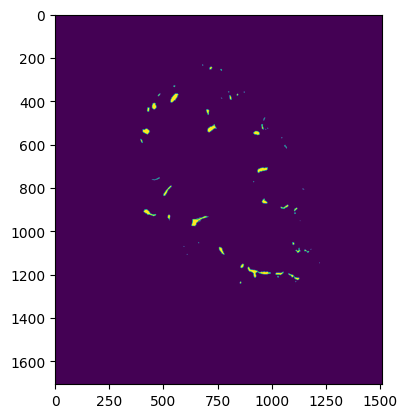

In [8]:
plt.imshow(image_filled_final)

In [63]:
from tqdm import tqdm
from skimage.morphology import flood_fill
from sklearn.metrics import f1_score

slice_indices = np.arange(0, labels.shape[0], 1)[:10]
f1_scores = []
image_filled_final_stacked = []

for slice_indx in tqdm(slice_indices, total=len(slice_indices)):


	indices = np.argwhere(labels[slice_indx] == 1)
	random_indices = np.random.choice(indices.shape[0], 150)
	random_indices = indices[random_indices]
	image_filled_final = flood_fill(image[slice_indx], seed_point=tuple(random_indices[0]), new_value=255, tolerance=2)==255
	if np.sum(image_filled_final) > 2000:
		image_filled_final = np.zeros_like(image_filled_final).astype(bool)
	
	for indx in range(len(random_indices[1:])):
		image_filled = flood_fill(image[slice_indx], seed_point=tuple(random_indices[indx]), new_value=255, tolerance=2)==255
		if np.sum(image_filled) < 2000:
			image_filled_final = np.logical_or(image_filled_final, image_filled)

	image_filled_final_stacked.append(image_filled_final)

	f1_score_val = f1_score(image_filled_final.flatten(), labels[slice_indx].flatten())

	print(f"{slice_indx=}, {f1_score_val=}")
 
	f1_scores.append(f1_score_val)

 10%|█         | 1/10 [00:00<00:07,  1.27it/s]

slice_indx=0, f1_score_val=0.9020150746039071


 20%|██        | 2/10 [00:01<00:06,  1.31it/s]

slice_indx=1, f1_score_val=0.832648538848622


 30%|███       | 3/10 [00:02<00:05,  1.35it/s]

slice_indx=2, f1_score_val=0.925077523256977


 40%|████      | 4/10 [00:02<00:04,  1.38it/s]

slice_indx=3, f1_score_val=0.8970120135537529


 50%|█████     | 5/10 [00:03<00:03,  1.47it/s]

slice_indx=4, f1_score_val=0.9153588886030358


 60%|██████    | 6/10 [00:04<00:02,  1.51it/s]

slice_indx=5, f1_score_val=0.9189684114146192


 70%|███████   | 7/10 [00:04<00:02,  1.45it/s]

slice_indx=6, f1_score_val=0.9117946628641271


 80%|████████  | 8/10 [00:05<00:01,  1.34it/s]

slice_indx=7, f1_score_val=0.9042346644277693


 90%|█████████ | 9/10 [00:06<00:00,  1.39it/s]

slice_indx=8, f1_score_val=0.9230847234193581


100%|██████████| 10/10 [00:07<00:00,  1.39it/s]

slice_indx=9, f1_score_val=0.9145135244247072


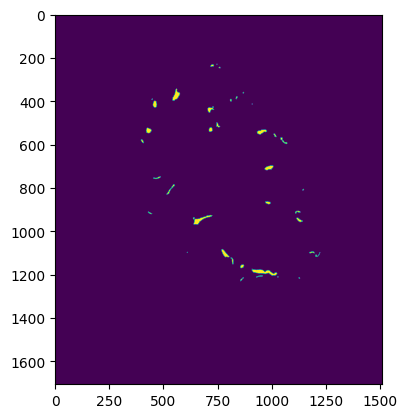

In [65]:
plt.imshow(image_filled_final_stacked[-1])

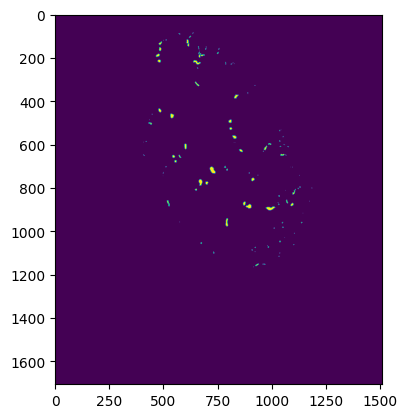

In [66]:
plt.imshow(labels[200])

In [67]:
image_filled_final_stacked_np = np.array(image_filled_final_stacked)
image_filled_final_stacked_np.shape

(10, 1706, 1510)

In [68]:
labels.shape

(501, 1706, 1510)

In [69]:
labels_subset = labels[:image_filled_final_stacked_np.shape[0]]
labels_subset.shape

(10, 1706, 1510)

In [70]:
from sennet.custom_modules.metrics.surface_dice_metric_fast import compute_surface_dice_score_from_mmap

mean_prob_chunks = [image_filled_final_stacked_np.astype(np.uint8)]
label = labels_subset.astype(np.uint8)
threshold = 0.5

dice = compute_surface_dice_score_from_mmap(mean_prob_chunks, label, threshold)
dice

0.7666057348251343